In [1]:
import numpy as np
import pandas as pd

# load the sarcoma transcriptome data
sarcoma_df = pd.read_csv('Data/sarcoma-gene-exp-FPKM-zscore-no-label.csv')
sarcoma_df.shape

(206, 20605)

In [2]:
sarcoma_labels_df = pd.read_csv('Data/sarcoma-gene-exp-FPKM-labels-histo.csv')
sarcoma_labels_df.shape

(206, 2)

In [3]:
sarcoma_labels_df.head

<bound method NDFrame.head of      label short histo
0        4         LMS
1        2         UPS
2        2         UPS
3        1         MFS
4        5       MPNST
..     ...         ...
201      2         UPS
202      2         UPS
203      3       DDLPS
204      1         MFS
205      2         UPS

[206 rows x 2 columns]>

In [4]:
# Convert transriptome df to np array
X = sarcoma_df.to_numpy()
print(X)

[[-0.51154087  0.09480786 -0.35176093 ...  0.51624723  0.02346097
   2.48359169]
 [-0.19129576  0.15347405  0.20261954 ... -0.41028013  2.86123234
   0.16777757]
 [ 0.26472818  2.327348   -0.56049386 ... -0.21651268  0.0192731
   0.76332633]
 ...
 [ 0.24931652 -0.03363532 -0.97441342 ... -0.50605902 -1.23871739
   0.28153212]
 [ 0.2581943  -0.8373263  -0.19647611 ... -0.29302061 -0.78367962
  -0.7597076 ]
 [-0.07085013 -0.29522455 -0.59015045 ... -0.50644652 -0.01137879
  -0.39862195]]


In [5]:
# Convert label df to np array
y_df = sarcoma_labels_df['label']
type_df = sarcoma_labels_df['short histo']
y = y_df.to_numpy()
print(y)

[4 2 2 1 5 3 2 4 4 3 4 4 4 3 0 3 1 4 2 4 4 0 2 4 3 3 3 2 0 4 4 5 3 3 2 4 4
 5 4 3 4 4 5 4 2 4 4 4 1 4 1 4 4 2 4 3 3 2 2 4 4 4 4 4 4 4 2 2 3 4 2 3 4 4
 3 4 3 2 4 3 2 3 4 4 3 4 3 4 3 4 4 1 3 4 4 4 0 4 3 4 3 3 3 5 2 0 3 3 1 1 4
 2 3 0 3 4 2 4 2 0 3 4 4 3 2 2 1 3 4 4 4 4 4 3 2 4 2 4 1 0 2 2 3 4 4 2 3 4
 4 3 1 3 4 3 4 2 2 1 3 2 2 0 4 2 1 4 2 1 4 3 3 4 2 4 2 4 3 4 2 1 3 4 2 4 4
 2 2 3 4 4 4 3 2 4 1 1 2 3 0 3 3 2 2 3 1 2]


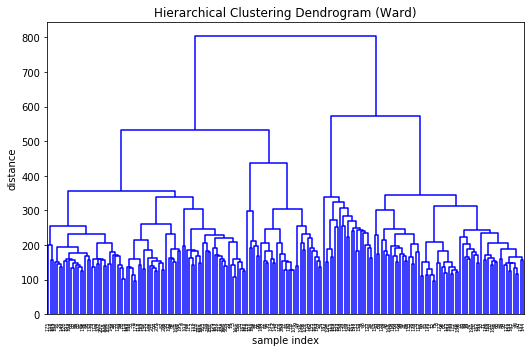

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

[0 1 3 1 1 2 1 1 0 3 0 0 0 2 2 3 1 0 1 0 0 4 3 0 2 5 5 3 4 1 0 2 2 1 3 1 0
 2 2 5 0 0 2 0 3 0 0 0 1 0 1 0 0 1 0 5 5 1 3 0 0 0 3 0 0 0 3 1 5 0 3 5 0 0
 5 0 5 3 0 5 5 5 1 0 3 0 3 0 5 0 0 1 5 0 1 1 4 0 5 0 5 5 5 1 1 4 3 5 5 3 0
 1 5 2 5 0 3 0 1 4 5 0 1 5 3 1 1 2 0 0 0 1 0 5 1 0 1 0 5 2 3 1 5 0 0 1 5 0
 5 5 1 2 0 2 0 3 2 1 2 1 1 4 2 1 3 5 1 1 0 1 3 0 0 0 3 5 2 0 1 1 1 0 1 0 3
 1 1 2 0 0 0 5 1 2 3 1 3 2 2 1 5 1 1 3 1 1]


In [8]:
from pandas import DataFrame

cluster_labels_df = DataFrame(data=cluster.labels_)
cluster_labels_df.columns = ["cluster"]
# cluster_labels_df.head
cluster_df = pd.concat([cluster_labels_df, type_df], axis=1)
#cluster_df.head
results = cluster_df.groupby(["cluster", "short histo"]).size()
print(results)

cluster  short histo
0        LMS            64
         UPS             1
1        DDLPS           4
         LMS             8
         MFS            12
         MPNST           2
         UPS            26
2        DDLPS          11
         LMS             3
         MPNST           3
         SS              4
         UPS             1
3        DDLPS           7
         LMS             2
         MFS             3
         UPS            15
4        SS              6
5        DDLPS          28
         LMS             3
         MFS             2
         UPS             1
dtype: int64


In [9]:
# create dataframe from Kmeans cluster array
sarcoma_hc_df = pd.DataFrame(results)   
# write sarcoma_pca_df to a csv file
sarcoma_hc_df.to_csv("Data/sarcoma-gene-exp-FPKM-hc-histo.csv", index=True)

In [10]:
# Cluster with K=3
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

[1 0 0 0 0 2 0 0 1 0 1 1 1 2 2 0 0 1 0 1 1 0 0 1 2 0 0 0 0 0 1 2 2 0 0 0 1
 2 2 0 1 1 2 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 2 0 1 0 1 0 0 0 1 0 0 0 0 0 2 1 1 1 0 1 0 0 1 0 1 0 2 0 0 0 1 1 0 0 1
 0 0 0 2 1 2 1 0 2 0 2 0 0 0 2 0 0 0 0 0 1 0 0 1 1 1 0 0 2 1 0 0 0 1 0 1 0
 0 0 2 1 1 1 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0]


In [11]:
from pandas import DataFrame

cluster_labels_df = DataFrame(data=cluster.labels_)
cluster_labels_df.columns = ["cluster"]
# cluster_labels_df.head
cluster_df = pd.concat([cluster_labels_df, type_df], axis=1)
#cluster_df.head
results = cluster_df.groupby(["cluster", "short histo"]).size()
print(results)

cluster  short histo
0        DDLPS          39
         LMS            13
         MFS            17
         MPNST           2
         SS              6
         UPS            42
1        LMS            64
         UPS             1
2        DDLPS          11
         LMS             3
         MPNST           3
         SS              4
         UPS             1
dtype: int64
